In [56]:
from moviepy.editor import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [57]:
video_clip = VideoFileClip("./video.mp4")
extracted_audio = video_clip.audio
extracted_audio.write_audiofile("extracted_audio.wav")

MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.


In [58]:
sample_rate, data = wavfile.read("extracted_audio.wav")
data = data/np.max(np.abs(data))

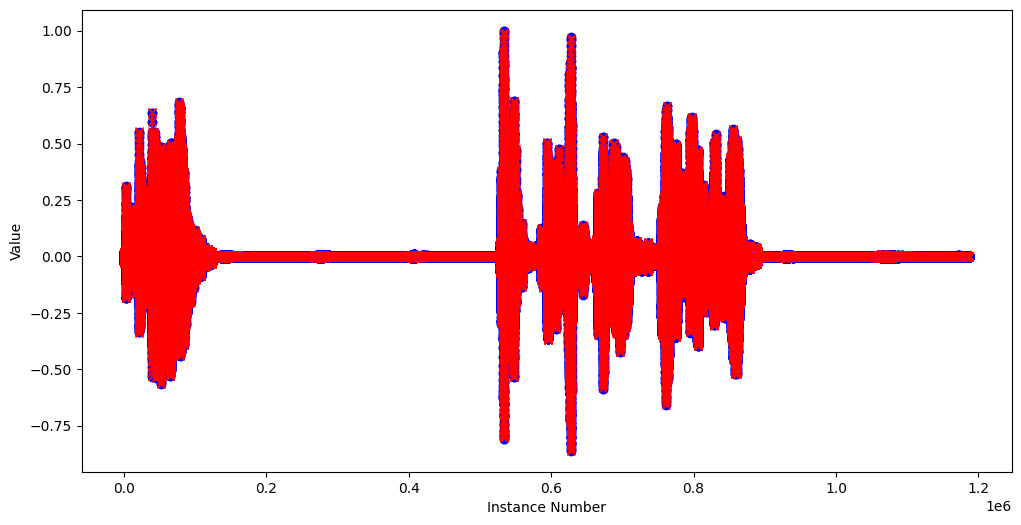

In [59]:
x = np.arange(len(data))  # x will be the index (instance number)
y1 = data[:, 0]           # y1 will be the first column of data
y2 = data[:, 1]           # y2 will be the second column of data

plt.figure(figsize=(12, 6))

plt.plot(x, y1, label='Data Column 1', color='blue', marker='o')
plt.plot(x, y2, label='Data Column 2', color='red', marker='x')

plt.xlabel('Instance Number')
plt.ylabel('Value')
plt.show()

In [60]:
data_transformed = np.max(data, axis=1)

# Reshape to (1187172, 1)
data_transformed = data_transformed.reshape(-1, 1)

print(data_transformed)  

[[-0.00371172]
 [-0.0061862 ]
 [-0.00525827]
 ...
 [ 0.00092793]
 [ 0.00092793]
 [ 0.00092793]]


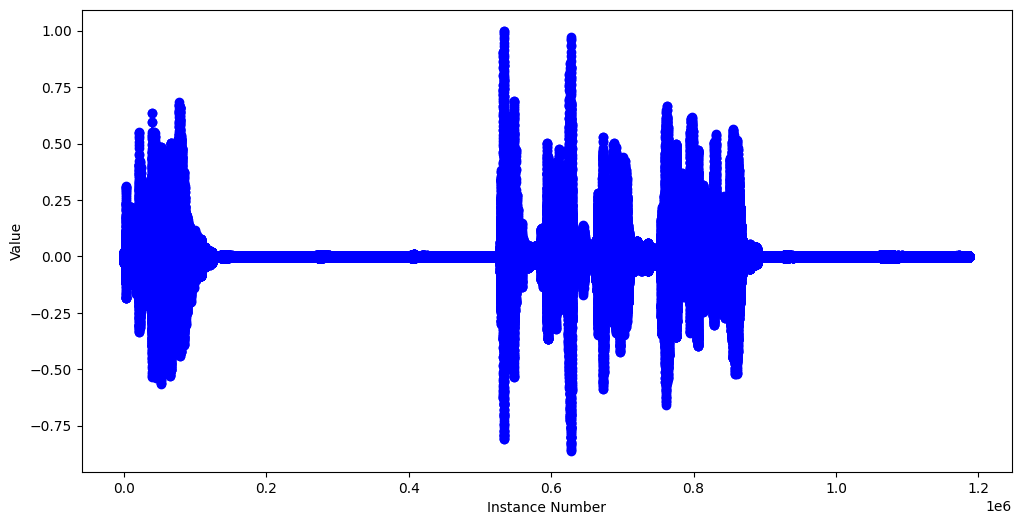

In [61]:
x = np.arange(len(data_transformed))  
y = data[:, 0]         
plt.figure(figsize=(12, 6))

plt.plot(x, y, label='Data Column 1', color='blue', marker='o')

plt.xlabel('Instance Number')
plt.ylabel('Value')
plt.show()

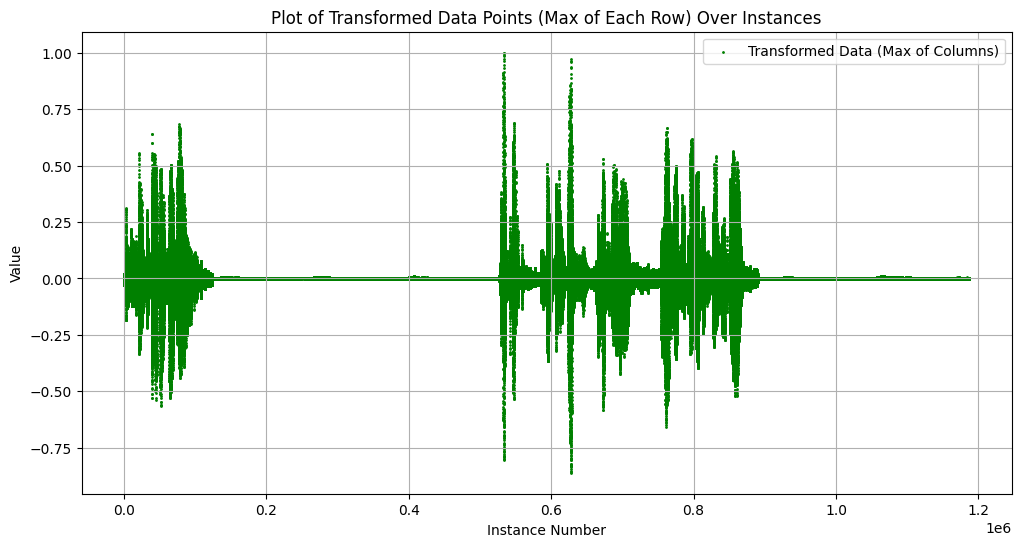

In [62]:
x = np.arange(len(data_transformed))  # x will be the index (instance number)
y_transformed = data_transformed  # y_transformed will be the maximum of each row

# Create a line plot
plt.figure(figsize=(12, 6))

plt.scatter(x, y_transformed, label='Transformed Data (Max of Columns)', color='green', marker='o', s=1)

# Add labels and title
plt.xlabel('Instance Number')
plt.ylabel('Value')
plt.title('Plot of Transformed Data Points (Max of Each Row) Over Instances')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

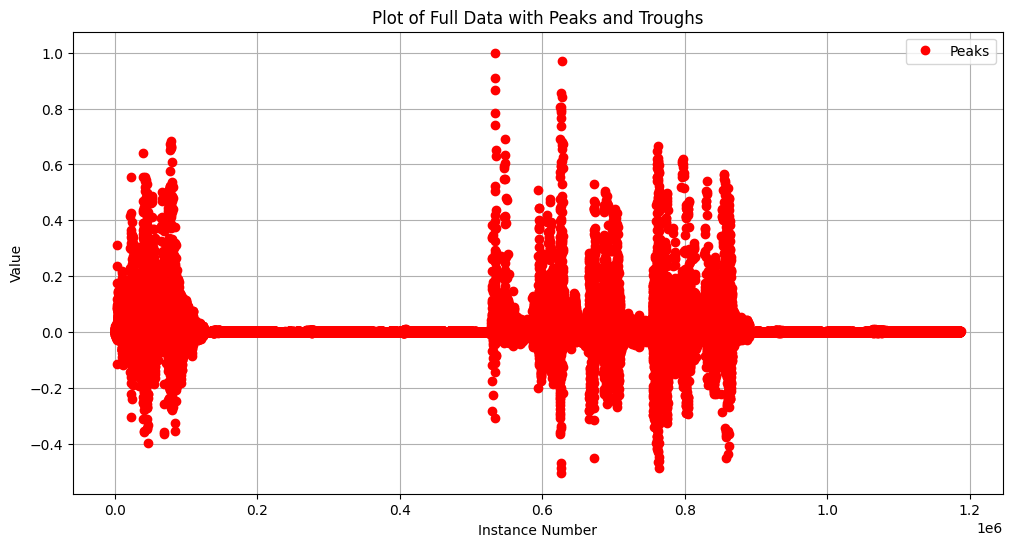

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming 'data' is your input array with shape (1187172, 1)

# Flatten the array to 1D
data_flat = data_transformed.flatten()

# Find local maxima and minima directly on the flattened data
peaks, _ = find_peaks(data_flat)
troughs, _ = find_peaks(-data_flat)
data_peaks = data_flat[peaks]
# Create a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the full data

# Mark peaks and troughs
ax.plot(peaks, data_flat[peaks], 'ro', label='Peaks')

# Add labels and title
ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Full Data with Peaks and Troughs')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


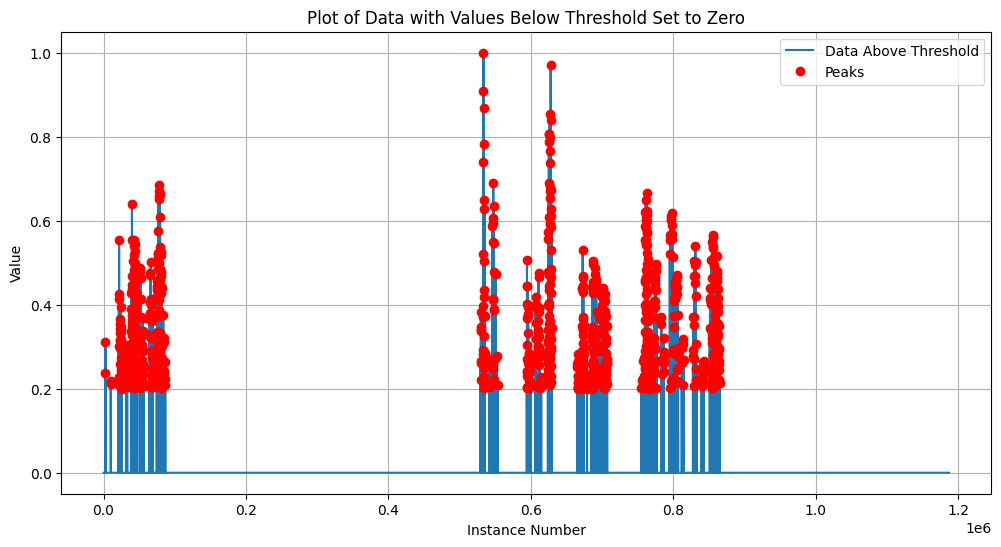

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming 'data' is your input array with shape (1187172, 1)
threshold = 0.2

# Flatten the array to 1D
data_flat = data_transformed.flatten()

# Set values below the threshold to 0
modified_data = np.where(data_flat > threshold, data_flat, 0)

# Generate corresponding indices for the modified data
indices = np.arange(len(data_flat))

# Find local maxima in the modified data
peaks, _ = find_peaks(modified_data)

# Create a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the modified data
ax.plot(indices, modified_data, label='Data Above Threshold')

# Mark peaks
ax.plot(indices[peaks], modified_data[peaks], 'ro', label='Peaks')
dt_peaks = modified_data[peaks]
# Add labels and title
ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Values Below Threshold Set to Zero')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


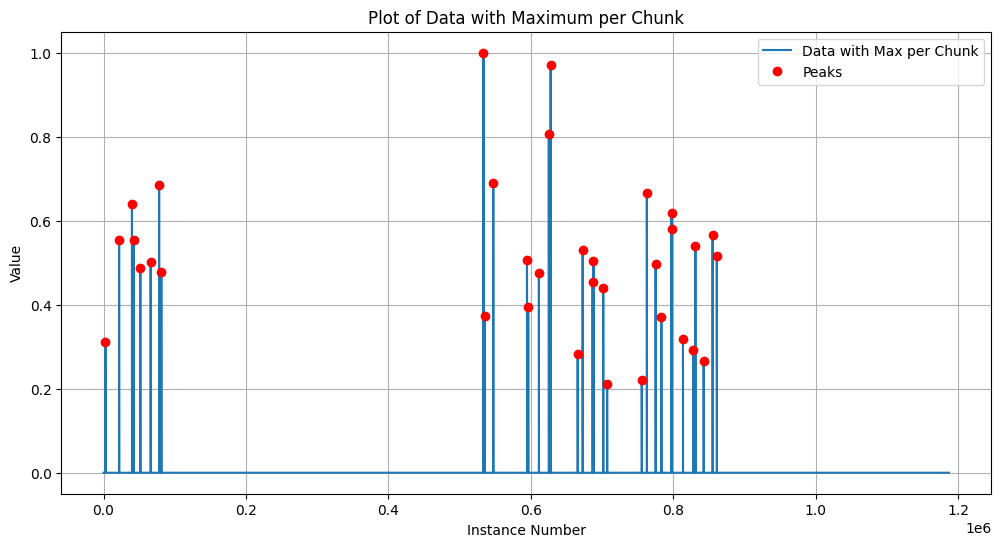

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data setup
# data = np.random.rand(1187172, 1)  # Use your actual data here
# For demonstration, I'm using a sample data array
data_flat = modified_data.flatten()  # Replace with your actual data

# Define chunk size
chunk_size = 10100

# Create an array to hold the new data
new_data = np.zeros_like(data_flat)

# Process each chunk
for i in range(0, len(data_flat), chunk_size):
    start_idx = i
    end_idx = min(start_idx + chunk_size, len(data_flat))
    chunk = data_flat[start_idx:end_idx]
    
    # Ensure we have a valid chunk
    if len(chunk) > 0:
        # Find the maximum value in the chunk
        max_value = np.max(chunk)
        # Place the maximum value in the corresponding position in the new array
        new_data[start_idx:end_idx] = np.where(chunk == max_value, max_value, 0)

# Find peaks in the new data
peaks, _ = find_peaks(new_data)

# Create a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the new data
ax.plot(new_data, label='Data with Max per Chunk')

# Mark peaks
ax.plot(peaks, new_data[peaks], 'ro', label='Peaks')

# Add labels and title
ax.set_xlabel('Instance Number')
ax.set_ylabel('Value')
ax.set_title('Plot of Data with Maximum per Chunk')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()


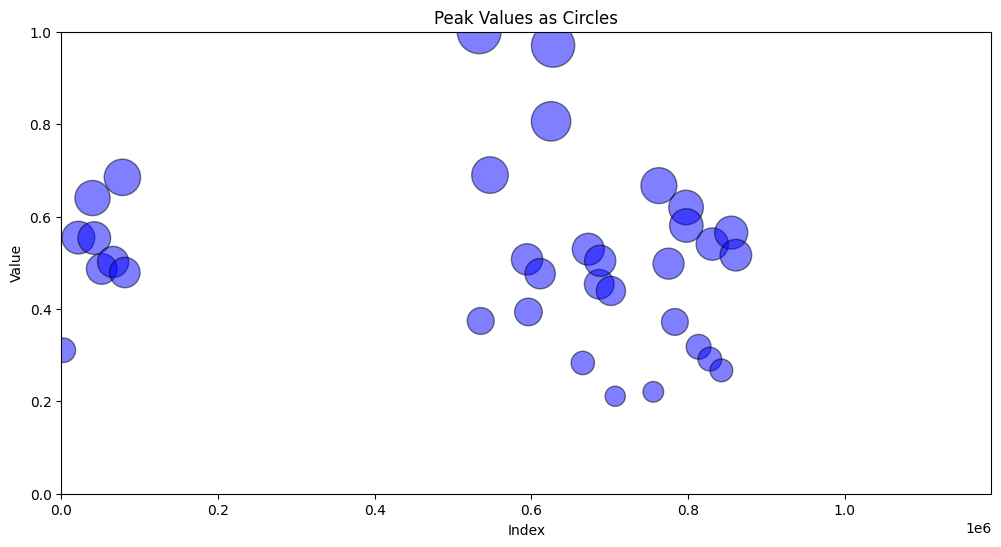

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
# new_data = np.random.random(1187172)  # Replace this with your actual new_data
# peaks = np.array([100, 200, 300])  # Replace this with your actual peaks indices



# Extract peak values
peak_values = new_data[peaks]

# Prepare data for plotting
x_positions = peaks
y_positions = peak_values

# Define sizes of circles (scaled for visibility)
sizes = peak_values * 1000

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sc = ax.scatter(x_positions, y_positions, s=sizes, c='blue', alpha=0.5, edgecolor='black')

# Label the plot
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Peak Values as Circles')
ax.set_xlim(0, len(new_data))
ax.set_ylim(0, np.max(new_data))

plt.show()


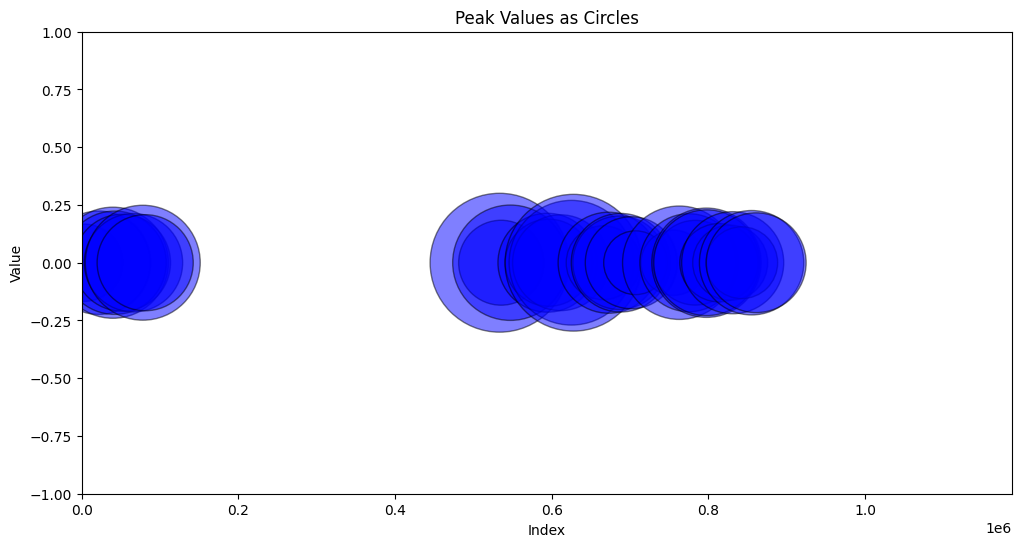

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
# new_data = np.random.random(1187172)  # Replace this with your actual new_data
# peaks = np.array([100, 200, 300])  # Replace this with your actual peaks indices

# Use the given new_data and peaks

# Extract peak values
peak_values = new_data[peaks]

# Prepare data for plotting
x_positions = peaks
y_positions = np.zeros_like(peak_values)  # Set all y positions to zero for uniform height

# Define sizes of circles (scaled for visibility)
sizes = peak_values * 10000

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sc = ax.scatter(x_positions, y_positions, s=sizes, c='blue', alpha=0.5, edgecolor='black')

# Label the plot
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Peak Values as Circles')
ax.set_xlim(0, len(new_data))
ax.set_ylim(-1, 1)  # Adjust y limits to ensure circles are visible at zero

plt.show()


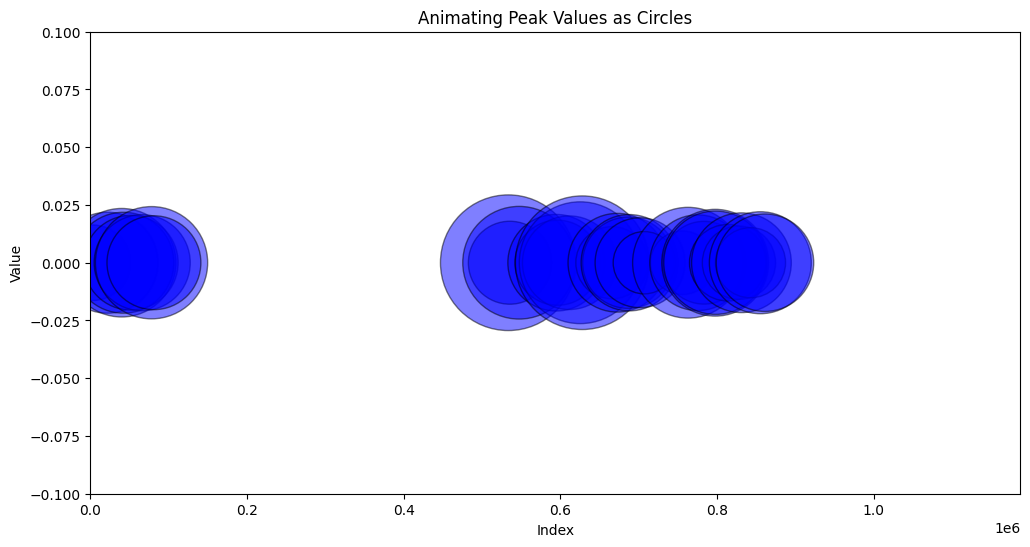

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Example data

# Extract peak values
peak_values = new_data[peaks]

# Prepare data for plotting
x_positions = peaks
y_positions = np.zeros_like(peak_values)  # Set y_positions to zero

# Define sizes of circles (scaled for visibility)
sizes = peak_values * 10000  # Adjust scaling factor as needed

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
sc = ax.scatter(x_positions, y_positions, s=sizes, c='blue', alpha=0.5, edgecolor='black')

# Set axis limits
ax.set_xlim(0, len(new_data))
ax.set_ylim(-0.1, 0.1)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Animating Peak Values as Circles')

# Animation update function
def update(frame):
    # Update sizes to create animation effect
    new_sizes = sizes * (1 + 0.1 * np.sin(frame / 10))  # Adjust animation effect as needed
    sc.set_sizes(new_sizes)
    return sc,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)

ani.save('animation.mp4', writer='ffmpeg')


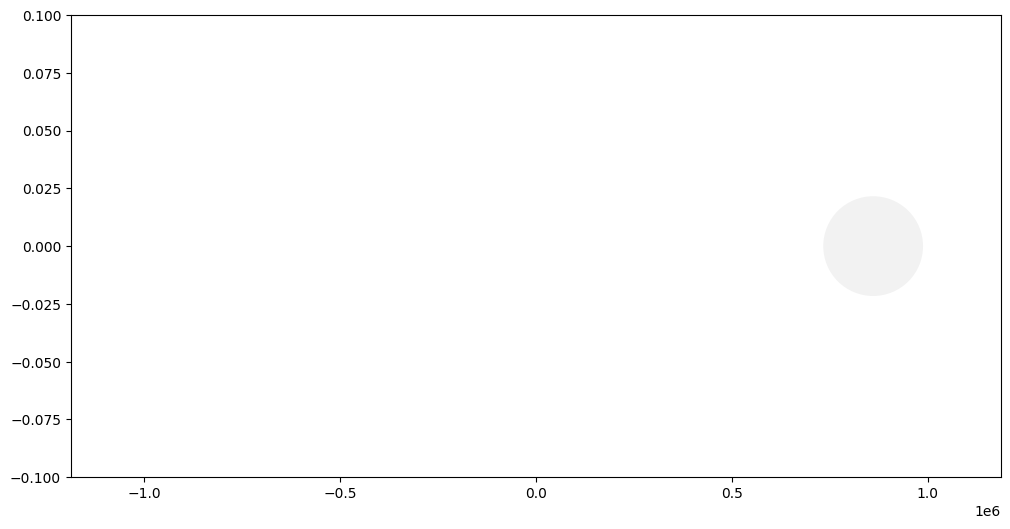

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Example data

# Extract peak values
peak_values = new_data[peaks]

# Prepare data for plotting
x_positions = peaks
sizes = peak_values * 10000  # Initial sizes

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')  # Set axis background to transparent
fig.patch.set_alpha(0)    # Set figure background to transparent

sc = ax.scatter([], [], s=[], c='gray', alpha=0.1, edgecolor='none')

# Set axis limits
ax.set_xlim(-len(new_data), len(new_data))
ax.set_ylim(-0.1, 0.1)

# Animation update function
def update(frame):
    # Reset the scatter plot data
    sc.set_offsets(np.c_[[], []])
    sc.set_sizes([])

    if frame < len(peaks):
        # Set the current circle to transition
        current_x = [x_positions[frame]]
        current_size = [sizes[frame]]

        # Update scatter plot
        sc.set_offsets(np.c_[current_x, [0]])  # Keep y_position at zero
        sc.set_sizes(current_size)

    return sc,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(peaks), interval=1000, blit=True)

# Display the animation in a Jupyter Notebook (if applicable)
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# To save the animation, uncomment the next line
ani.save('transition_animation.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})

plt.show()


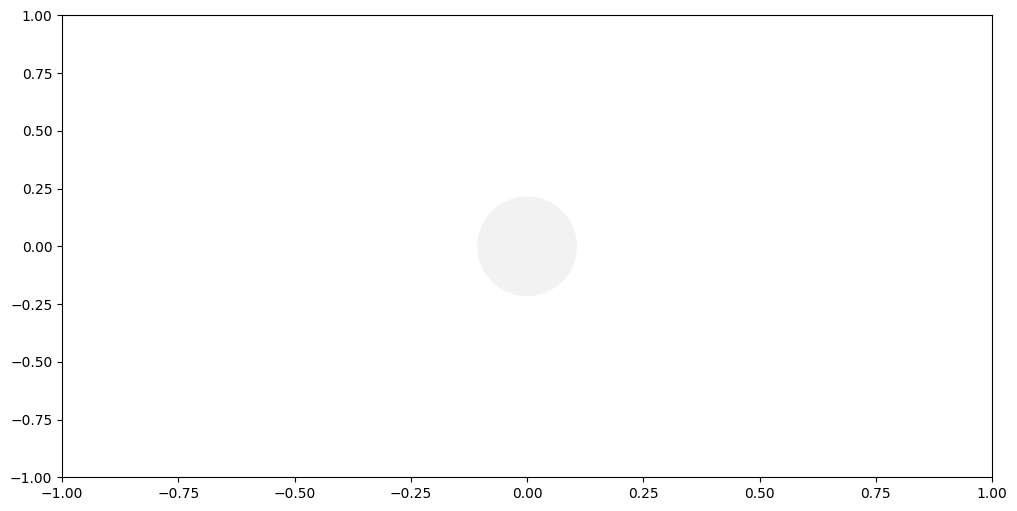

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Example data (replace with your actual data)

# Extract peak values
peak_values = new_data[peaks]

# Prepare data for plotting
sizes = peak_values * 10000  # Initial sizes

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('none')  # Set axis background to transparent
fig.patch.set_alpha(0)    # Set figure background to transparent

sc = ax.scatter([0], [0], s=sizes[0], c='gray', alpha=0.1, edgecolor='none')

# Set axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Animation update function
def update(frame):
    # Update the size of the scatter plot
    current_size = sizes[frame]

    # Update scatter plot
    sc.set_sizes([current_size])

    return sc,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(peaks), interval=1000, blit=True)

# To save the animation
ani.save('transition_animation.mp4', writer='ffmpeg', dpi=300, savefig_kwargs={'transparent': True})

plt.show()
